#### 데이터셋에서의 질문-->시가,상한가,하한가가 3개월 간 가격의 변동과 어떠한 관계를 보이며 얼마나 잘 설명하는가?

In [1]:
import pandas as pd

In [2]:
netflix = pd.read_csv("netflix.csv")

In [3]:
netflix.head()

,Date,Price,Open,High,Low,Vol,Change
0,24-Apr-20,421.89,425.20,426.29,415.88,2.83M,-1.13%
1,23-Apr-20,426.70,420.06,438.31,420.06,13.95M,1.25%
2,22-Apr-20,421.42,428.77,432.62,413.36,21.12M,-2.86%
3,21-Apr-20,433.83,444.90,446.41,425.99,23.18M,-0.84%
4,20-Apr-20,437.49,434.40,444.39,430.56,12.66M,3.44%


In [4]:
netflix.tail()

,Date,Price,Open,High,Low,Vol,Change
74,08-Jan-20,339.26,331.49,342.70,331.05,7.11M,2.57%
75,07-Jan-20,330.75,336.47,336.70,330.30,4.74M,-1.51%
76,06-Jan-20,335.83,323.12,336.36,321.20,5.67M,3.05%
77,03-Jan-20,325.90,326.78,329.86,325.53,3.80M,-1.19%
78,02-Jan-20,329.81,326.10,329.98,324.78,4.35M,1.93%


In [ ]:
# prepocessing--> 데이터셋의 항목에서 Price,Open,High,Low를 추출한다. 

In [5]:
df = netflix[["Price","Open","High","Low"]]

In [6]:
df.head()

,Price,Open,High,Low
0,421.89,425.20,426.29,415.88
1,426.70,420.06,438.31,420.06
2,421.42,428.77,432.62,413.36
3,433.83,444.90,446.41,425.99
4,437.49,434.40,444.39,430.56


#### 결과를 보면 1월부터 4월까지 넷틀릭스의 주가는 320부터  소폭 상승중이고 4월중순부터 400을 넘어서 어느정도 상/하한폭으로 주가가 증가하고 있다. 회귀분석을 통해서 이제 시가, 상한가, 하한가의 흐름이 전체가격을 어떻게 설명하는지 알아볼 수 있다. 

In [7]:
import statsmodels.api as sm

In [8]:
import statsmodels.formula.api as smf

In [9]:
res = smf.ols(formula='Price~Open+High+Low',data = df).fit()

In [10]:
res

In [11]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     799.6
Date:                Fri, 01 May 2020   Prob (F-statistic):           7.95e-57
Time:                        01:55:52   Log-Likelihood:                -242.85
No. Observations:                  79   AIC:                             493.7
Df Residuals:                      75   BIC:                             503.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7008      7.592      0.487      0.6

In [ ]:
#OLS 모형 결과 해석하기

테이블을 통해서 Y = 3.7008 - 0.3189x1 + 0.6106x2 + 0.7005x3의 다중회귀직선이다. 

Adjusted R^2의 공식을 통해서 주어진 자유도가 n=79일 때, 회귀직선의 독립변수, 즉 slope coefficient(B)의 개수는 3개다.

R^2자체는 자료의 개수와 투입되는 변수에 상관없이 값이 증가하므로 adjusted R^2를 통해서 독립변수의 종속변수에 대한 정확성을 구해야 한다.

F 통계량은 적어도 하나의 독립변수가 종속변수를 얼마나 잘 설명하냐를 의미하는 지표이고 값이 799.6이므로의 각 독립변수는 가격에 대해 설명을 잘 한다.

P값은 각각 1%,5%,10%의 유의성 구간을 기준으로 귀무가설의 부정 여부를 판단하고 만약 부정이 가능하면 값이 0에 가까워지고 변수의 유의미하다.
OLS 모형에서 보면 intercept coefficient 값의 p값은 유의성 구간10%에 해당되지 않으므로 이 변수는 아무 의미도 갖지 못한다. 
즉, intercept coefficient 자체는 가격에 대한 설명을 전혀 할 수 없고 다만 나머지 slope coefficient의 값이 0일 경우에만 y값과 일치할 뿐이다.
나머지 open,high,low의 p값들의 경우 모두 1%의 유의성 구간에 속해 있으며 전부 0에 거의 가까운 값을 가지고 있으므로 각각의 독립변수들이 그만큼
종속변수를 의미있게 잘 설명한다.

Skewness 0.850,kurtosis가 5.050이라는 점은 회귀직선이 왼쪽/오른쪽으로 쳐진 상태보다 상대적으로 표준정규분포를 더 따른다는 것을 의미한다.
또한, prob(omnibus)가 0.025로 미시하게 잔차항이 표준정규분포를 따른다.

주의사항에 보면 multicollienearity가 언급된다. 이것이 나타난 이유는 애초에 R^2의 정확성이 0.970으로 매우 높았기 때문이다.  
선들의 모형의 위치가 겹쳐서 독립변수 3개 모두가 물론 종속변수와 강한 상관관계가 나타나서 설명의 정확성이 높이는 동시에, 
각각의 독립변수들 별개로 종속변수를 설명하는 정확성은 낮다. 일반적으로 그러면 독립변수 셋중 하나는 p값이 유의성 구간 10%를 
초과해서 잔차항으로 분리해야 되는데 이 자료에는 독립변수 세개가 모두 p값이 완벽하게 귀무가설을 부정하여 각각의 변수가 유의미하다.


아래에는 각 독립변수마다의 플롯들을 시각화한 자료다. 여기서 볼 수 있듯이 개별로 나눈 회귀직선 플롯과 스캐터, 일반 선형 플롯의 경우
세 변수 모두 값들의 흐름이 거의 비슷하다. 그래서 multicollinearity 위험이 있을 수 있다는 의미로 OLS모형이 주의를 준 것이다.
그래프들을 비교하면 세 독립변수 모두 가격이 320~380인 직선 주변에 각각의 값들이 가장 많이 분포되어 있다. 아마도 이 지점에서 각 변수들과 가격의 
상관관계가 극대화돼서 서로 거상승 흐름이 거의 일치했음을 예측할 수 있다. 또한 직선이 모두 y=x의 방향이므로 가격 역시 앞으로도 상승하여 차후에 점들의 
산포도가 400 이상의 값들에 분포될 수 있다.

In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

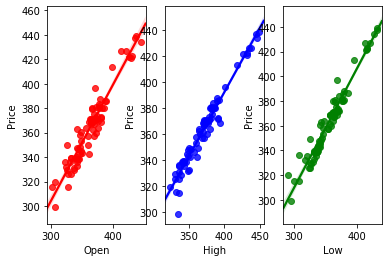

In [35]:
plt.subplot(1,3,1)
sns.regplot('Open','Price',df,color='red')
plt.subplot(1,3,2)
sns.regplot('High','Price',df,color='blue')
plt.subplot(1,3,3)
sns.regplot('Low','Price',df,color='green')

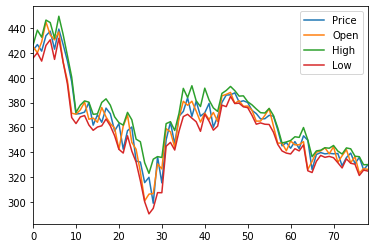

In [15]:
df.plot()

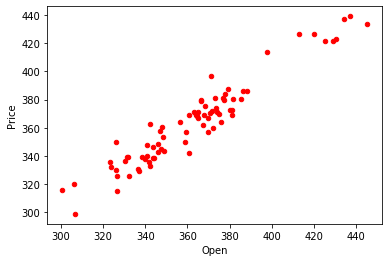

In [16]:
df.plot('Open','Price',kind="scatter",color="red")

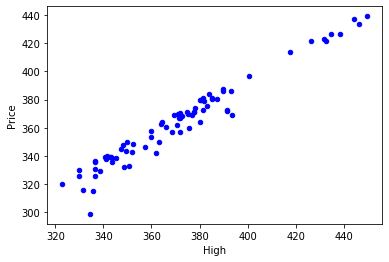

In [17]:
df.plot('High','Price',kind="scatter",color="blue")

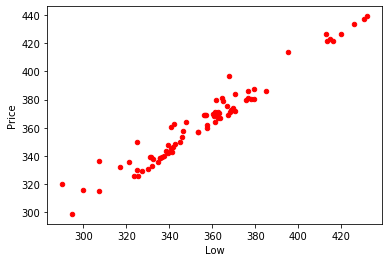

In [18]:
df.plot('Low','Price',kind="scatter",color="red")

#### predict-->다중선형회귀모형으로 독립변수에 임의값 x를 대입해서 종속변수 y값을 추출하기

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
x = df[["Open","High","Low"]] 

In [22]:
y = df["Price"] 

In [23]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 독립변수 open은 종속변수와 음의 상관관계이므로 다른 값들이 일정할 때 open 변수의 값이 1% 증가하면 y의 값은 open의 slope coefficient만큼 감소한다. 

In [24]:
Open = 20
High = 40
Low = 35
regionA = [Open,High,Low]
PriceA = model.predict([regionA])
PriceA

array([46.26503761])

In [36]:
Open = 15
High = 40
Low = 35
regionA = [Open,High,Low]
PriceA = model.predict([regionA])
PriceA

array([49.4540027])

In [38]:
Open = 5
High = 40
Low = 35
regionA = [Open,High,Low]
PriceA = model.predict([regionA])
PriceA

array([51.04848524])

##### OLS모형에서 추정한 결과, kurtosis가 5.050, skewness가 0.850인 것으로 표준정규분포의 특성이 더 나타나는 것을 알 수 있다. 그 결과, 각 독립변수들의 정규분포는 오른쪽으로 쳐지는 것 같으면서도 어느정도 표준정규분포를 따르고 있다. 

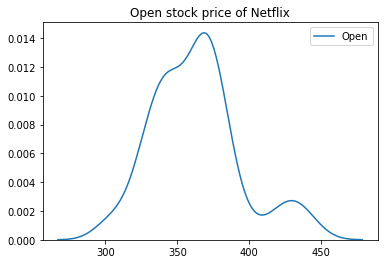

In [25]:
sns.kdeplot(df["Open"])
plt.title("Open stock price of Netflix")
plt.show()

(array([ 3.,  6., 15.,  9., 21., 15.,  2.,  1.,  3.,  4.]),
 array([300.77 , 315.183, 329.596, 344.009, 358.422, 372.835, 387.248,
        401.661, 416.074, 430.487, 444.9  ]),
 <a list of 10 Patch objects>)

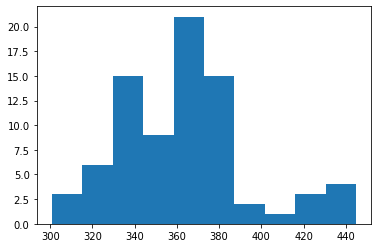

In [26]:
plt.hist(df["Open"])

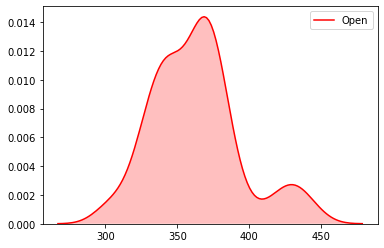

In [27]:
sns.kdeplot(df["Open"],shade = True, color = "red")

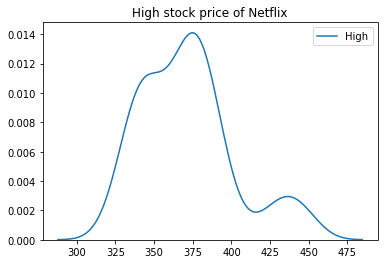

In [28]:
sns.kdeplot(df["High"])
plt.title("High stock price of Netflix")
plt.show()

(array([ 5., 16.,  9., 15., 17.,  7.,  1.,  1.,  4.,  4.]),
 array([322.9 , 335.56, 348.22, 360.88, 373.54, 386.2 , 398.86, 411.52,
        424.18, 436.84, 449.5 ]),
 <a list of 10 Patch objects>)

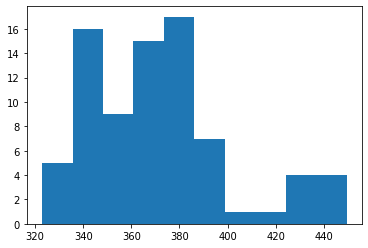

In [29]:
plt.hist(df["High"])

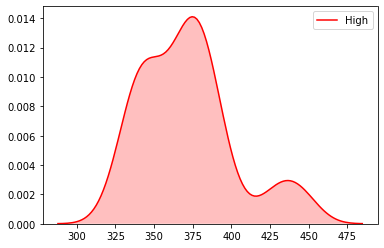

In [30]:
sns.kdeplot(df["High"],shade = True, color = "red")

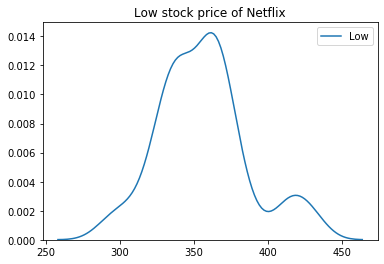

In [31]:
sns.kdeplot(df["Low"])
plt.title("Low stock price of Netflix")
plt.show()

(array([ 3.,  3., 11., 17.,  9., 20.,  7.,  1.,  4.,  4.]),
 array([290.25, 304.4 , 318.55, 332.7 , 346.85, 361.  , 375.15, 389.3 ,
        403.45, 417.6 , 431.75]),
 <a list of 10 Patch objects>)

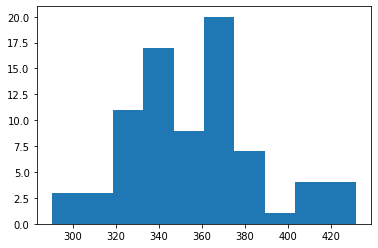

In [32]:
plt.hist(df["Low"])

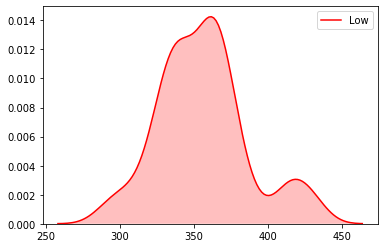

In [33]:
sns.kdeplot(df["Low"],shade = True, color = "red")

#### 정규분표들을 보면, 각 변수들의 가격의 흐름은 320~380에서 최빈값들을 이루었다. 그러나 주가가 400이상을 찍은 빈도는 압도적으로 적게 나온다. 그것은 4월14일이 돼서야 그날 기준으로 주가가 400을 넘었기 때문이다. 최근 넷플릭스는 더욱 다양한 작품 상영으로 계약을 확장하고 있으므로 4월14일 기준으로 주가가 400을 넘고 한동안 400대에서 가격이 수렴을 할 것으로 예측된다. 